In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20,10)

# Lab #3: Asking a Statistical Question

### Problem 1:
We are performing an expirment which only works reliably in a narrow temperature range around 12 Kelvin. When the temperature control system is working correctly, it should maintain a temperature around 12 Kelvin with a standard deviation of 0.4K. We want to discard data in cases where the temperature control system is not working correctly, and also discard data when our thermometry which measures the temperature is malfunctioning.

#### A) Our goal is to identify the bad data and throw it out.

##### 1) Start by exploring the data you have created with appropriate plots.

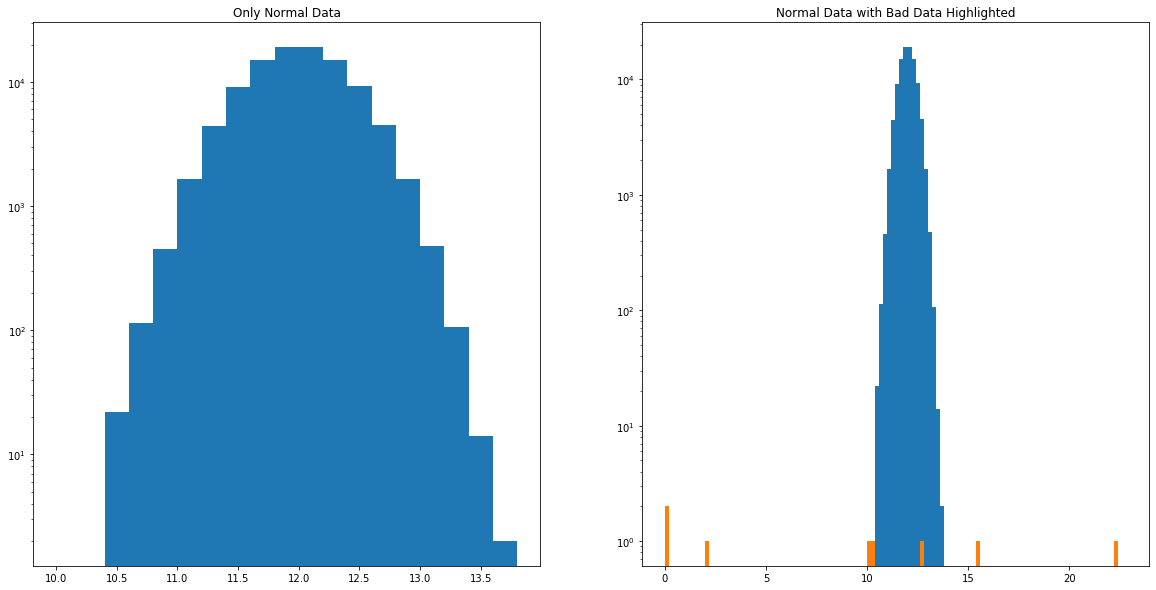

In [3]:
fig, (plt1,plt2) = plt.subplots(1,2)
np.random.seed(1234)

dist = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
plt1.hist(dist, np.arange(10,14,0.2))

#Bad Data:
b = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]

dist = np.append(dist,b)
plt2.hist(dist, np.arange(0,23,0.2))
plt2.hist(b, np.arange(0,23,0.2))

plt1.set_yscale('log')
plt2.set_yscale('log')

plt1.title.set_text('Only Normal Data')
plt2.title.set_text('Normal Data with Bad Data Highlighted')
plt.show()

##### 2) State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
Suppose we have a temperature measurement A. What is the probability that a random measurement produced by a gaussian distribution centered at 12K with a standard deviation of 0.4K would be as far, or further from the mean, than A? Let us discard any measurement which exceeds the threshold 3 $\sigma$.

##### 3) Restate your question in math. Be very clear.
This function will give us the probability of getting measurement A from a gaussian distribution centered at 12K with a standard deviation of 0.4K
$$P(A) = 2*\int_{|A-12|}^\infty\frac{1}{0.4}e^{\frac{-1}{2}*(\frac{x}{0.4})^2}$$
This is the quantile function, and will convert a probability into corresponding z-score for the standard normal distribution.
$$\Phi(p) = \sqrt{2}\erf^{-1}(2p-1)$$
Finally, we must choose whether to discard or keep the measurement:
$$\begin{cases}\Phi \leq 3, & Keep \\ \Phi > 3, & Discard \end{cases}$$

##### 4) Apply your statistical test and construct a truth table

In [5]:
np.random.seed(1234)
dist = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
b = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

#Counts
good_keep = 0
good_discard = 0
bad_keep = 0
bad_discard = 0

maxSigma = 3

dist = abs(dist-12)
b = abs(b-12)
p1 = stats.norm.cdf(-dist,scale=0.4)
p1 = 1-p1
s1 = stats.norm.ppf(p1, loc=0,scale=1)

p2 = stats.norm.cdf(-b,scale=0.4)
p2 = 1-p2
s2 = stats.norm.ppf(p2,loc=0,scale=1)

for data in s1:
    if data <= maxSigma:
        good_keep +=1
    else:
        good_discard +=1
        
for data in s2:
    if data <= maxSigma:
        bad_keep+=1
    else:
        bad_discard+=1
        
print("Good data points kept: ", good_keep, "\nGood data points discarded: ", good_discard, "\nTotal good data points: ", good_keep+good_discard)
print()
print("Bad data points kept: ", bad_keep, "\nBad data points discarded: ", bad_discard, "\nTotal bad data points: ", bad_keep+bad_discard)

Good data points kept:  99741 
Good data points discarded:  259 
Total good data points:  100000

Bad data points kept:  1 
Bad data points discarded:  7 
Total bad data points:  8


|             | Good Data | Bad Data |
|-------------|-----------|----------|
| Kept:       |    99,741 |        1 |
| Discarded:  |       259 |        7 |

#### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose, and is it a predictable quantity?

In [7]:
np.random.seed(1234)
dist = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
b = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

dist = abs(dist-12)
b = abs(b-12)
p1 = stats.norm.cdf(-dist,scale=0.4)
p1 = 1-p1
s1 = stats.norm.ppf(p1, loc=0,scale=1)

p2 = stats.norm.cdf(-b,scale=0.4)
p2 = 1-p2
s2 = stats.norm.ppf(p2,loc=0,scale=1)

good_keep = [0,0,0,0,0,0,0, 0, 0, 0, 0]
good_discard = [0,0,0,0,0,0,0, 0, 0, 0, 0]
bad_keep = [0,0,0,0,0,0,0, 0, 0, 0, 0]
bad_discard = [0,0,0,0,0,0,0, 0, 0, 0, 0]
max_sigma = [1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 10]
index = 0

for cutoff in max_sigma:
    for good_data in s1:
        if good_data <= cutoff:
            good_keep[index] +=1
        else:
            good_discard[index] += 1
    for bad_data in s2:
        if bad_data <= cutoff:
            bad_keep[index]+=1
        else:
            bad_discard[index]+=1
    index+=1

print("Sigma Threshold: ", max_sigma)
print("Good data points retained: ", good_keep)
print("Good data points discarded: ", good_discard)
print("Bad data points retained: ", bad_keep)
print("Bad data points discarded: ", bad_discard)

Sigma Threshold:  [1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 10]
Good data points retained:  [68120, 86566, 95491, 98813, 99741, 99962, 99998, 100000, 100000, 100000, 100000]
Good data points discarded:  [31880, 13434, 4509, 1187, 259, 38, 2, 0, 0, 0, 0]
Bad data points retained:  [0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3]
Bad data points discarded:  [8, 8, 7, 7, 7, 7, 7, 5, 5, 5, 5]


|                           | Good Data | Bad Data |
|---------------------------|-----------|----------|
| Kept @ 1$\sigma$ :        |    68,120 |        0 |
| Discarded @ 1$\sigma$ :   |    31,880 |        8 |
| Kept @ 1.5$\sigma$ :      |    86,566 |        1 |
| Discarded @ 1.5$\sigma$ : |    13,434 |        7 |
| Kept @ 2$\sigma$ :        |    95,491 |        1 |
| Discarded @ 2$\sigma$ :   |      4509 |        7 |
| Kept @ 2.5$\sigma$ :      |    98,813 |        1 |
| Discarded @ 2.5$\sigma$ : |      1187 |        7 |
| Kept @ 3$\sigma$ :        |     99741 |        1 |
| Discarded @ 3$\sigma$ :   |       259 |        7 |
| Kept @ 3.5$\sigma$ :      |    99,962 |        1 |
| Discarded @ 3.5$\sigma$ : |        38 |        7 |
| Kept @ 4$\sigma$ :        |    99,998 |        1 |
| Discarded @ 4$\sigma$ :   |         2 |        7 |
| Kept @ 5$\sigma$ :        |   100,000 |        3 |
| Discarded @ 5$\sigma$ :   |         0 |        5 |

As we can see from the trials above, as the our sigma threshold increases, our discriminator becomes less discriminating - in other words, it is more likely to accept data, whether that data is good or bad. By the time we reach a cutoff of 5 $\sigma$, every single good data point was accepted.

The quantity of omitted datapoints is predictable (though not precisely), as we know the probability that corresponds to any given value of sigma. For example, we know that only 4.56% of data points in a standard normal distribution lie more than 2$\sigma$ away from the mean in either direction. So, if we generate 100,000 random data points from a standard normal distribution, and discard any points more than 2$\sigma$ away from the mean, we expect to discard about 4,560 - in reality, we discard 4,509.

#### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

In [6]:
np.random.seed(1234)
dist = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
b = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

dist = abs(dist-12)
b = abs(b-12)
p1 = stats.norm.cdf(-dist,scale=0.4)
p1 = 1-p1
s1 = stats.norm.ppf(p1, loc=0,scale=1)

p2 = 2*stats.norm.cdf(-b,scale=0.4)
p2 = 1-p2
s2 = stats.norm.ppf(p2,loc=0,scale=1)

good_keep = 0
good_discard = 0
bad_keep = 0
bad_discard = 0

maxSigma = 1
sig_figs = 1
while sig_figs < 4:
    bad_keep = 0        
    for data in s2:
        if data <= maxSigma:
            bad_keep+=1
    if bad_keep < 1:
        maxSigma = maxSigma + 0.1**sig_figs
    else:
        maxSigma-= 0.1**sig_figs
        sig_figs +=1

bad_keep = 0         
for data in s1:
    if data <= maxSigma:
        good_keep +=1
    else:
        good_discard +=1
        
for data in s2:
    if data <= maxSigma:
        bad_keep+=1
    else:
        bad_discard+=1
        
print("Max Sigma before comission error: ", maxSigma)
print("Good data points retained: ", good_keep)
print("Good data points discarded: ", good_discard)
print("Bad data points retained: ", bad_keep)
print("Bad data points discarded: ", bad_discard)

Max Sigma before comission error:  1.404
Good data points retained:  83867
Good data points discarded:  16133
Bad data points retained:  0
Bad data points discarded:  8


The maximum threshold for which there are no comission errors given our set of bad data points is $1.404\sigma$. With any lower threshold, no comission errors will be comitted, but with any threshold higher than this (at the same or lesser number of significant figures), there will be at least one commission error. Note however, that at such a low threshold we discard many more good data points - although given that we keep a significant majority of the good data points, this may be an acceptable sacrifice.

#### Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

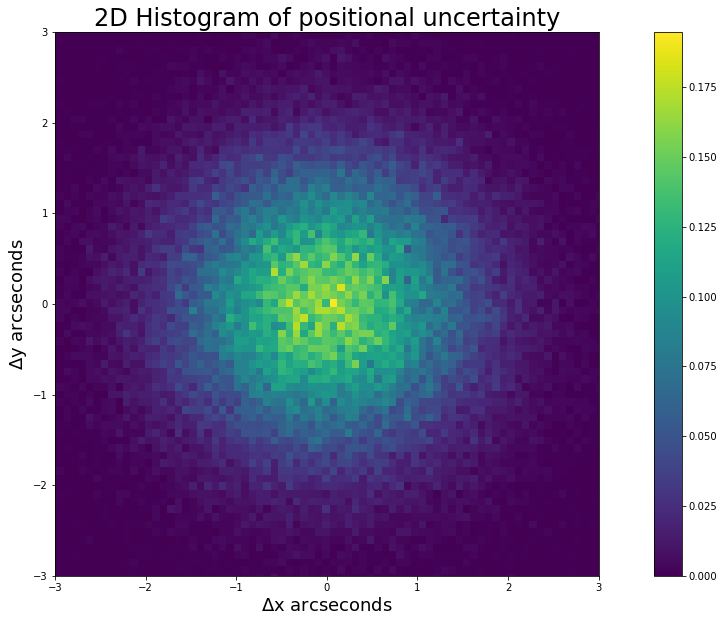

In [7]:
np.random.seed(1234)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

##### If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

##### 1) What is the question in words?

What is the radius in arcseconds of the circle around the center of the image such that any detections outside of that circle have a signficance of $5\sigma$ or greater?

##### 2) What is the question in math?

As we saw in the homework, the magnitude of a vector made of two independent Gaussian distributions is a Rayleigh distribution with pdf:

$$p(x)=\frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}}$$

We know that our Gaussian distributions each have $\sigma = 1$ arcsecond, using the pdf above, we get the cdf:

$$ C(r)=\int_0^a re^{\frac{-r^2}{2}}dr = -e^{\frac{-r^2}{2}}\bigg|_0^a = 1-e^{\frac{-a^2}{2}}$$

$$a=\sqrt{-2\ln(1-C(r))}$$

Where a is the quantile of the probability found by our cdf. Finally, we move on to detection where:

$$\begin{cases}a < 5, & Discard \\ a \geq 5, & Detection \end{cases}$$

#### 3) What distance in arcseconds represents a 5 sigma detection of motion?
To find this, we use a trial and error method by incrementaly increasing the distance until we reach a 5 sigma detection.

In [72]:
dist = 0
sigma = 0
sigfigs = 0

while sigfigs < 4: 
    prob = stats.rayleigh.cdf(dist, scale = 1)
    sigma = stats.norm.ppf(prob)
    if(sigma < 5):
        dist = dist + 0.1**sigfigs
    else:
        dist = dist-0.1**sigfigs
        sigfigs+=1
sigfigs-=1
dist = dist+0.1**sigfigs

print("Distance for ", np.round(sigma,1), " Sigma is ", np.round(dist,1), "arcseconds")

Distance for  5.0  Sigma is  5.5 arcseconds


#### Problem 3
Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

##### 1) What is the question in words?

If we expect to see 1 cosmic ray per minute, and see 6800 cosmic rays over the course of 7200 minutes, what is the significance of this result?

##### 2) Translate the question into math, describing both the expected background pdf and the integral you need to do.
We expect to see a background Poisson Distribution, which has the following pmf:

$$P(k;\lambda)=\frac{\lambda^k*e^{-\lambda}}{k!}$$

Where k is the number of occurences, and lambda is the expected rate of cosmic rays. After we have this, we must then perform the following sum to get the cdf:

$$C = e^{-\lambda}*\sum_{i=0}^k\frac{\lambda^i}{i!}$$

In this case, we plug in the number of actual cosmic rays we saw as k, and the number we expected to see as lambda, 6800 and 7200 respectively.

##### 3) Convert to sigma:
Finally, in order to convert to sigma, we simply plug the probability from our cdf into the normal ppf, and find that the significance of our detection was -4.75 sigma.

In [55]:
prob = stats.poisson.cdf(k=6800, mu=7200)
sigma = stats.norm.ppf(q=prob)

print("Significance of our detection: " , np.round(sigma, 2), " sigma")

Significance of our detection:  -4.75  sigma
